# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

### Цель лабораторной работы:

Изучение способов предварительной обработки данных для дальнейшего формирования моделей.

### Задание:


    1) Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
    
    2) Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
        a) обработку пропусков в данных;
        b) кодирование категориальных признаков;
        c) масштабирование данных.


### Импорт библиотек

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from io import StringIO
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
%matplotlib inline 
sns.set(style="ticks")

### Смотрим на датасет

In [33]:
data = pd.read_csv('./shopping_trends1.csv')

In [34]:
print('Строк:       {}'.format(data.shape[0]))
print('Столбцов:    {}'.format(data.shape[1]))

Строк:       3900
Столбцов:    19


In [35]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1.0,55.0,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14.0,NaN,Fortnightly
1,2.0,19.0,NaN,Sweater,Clothing,NaN,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,NaN,Yes,NaN,2.0,Cash,Fortnightly
2,NaN,50.0,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,NaN,Yes,Yes,23.0,Credit Card,Weekly
3,4.0,21.0,NaN,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49.0,PayPal,Weekly
4,5.0,45.0,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,NaN,2.7,Yes,Cash,Free Shipping,Yes,Yes,31.0,PayPal,Annually


In [36]:
data.isnull().sum()

Customer ID                 368
Age                         359
Gender                      349
Item Purchased              367
Category                    362
Purchase Amount (USD)       350
Location                    382
Size                        339
Color                       346
Season                      393
Review Rating               339
Subscription Status         390
Payment Method              415
Shipping Type               355
Discount Applied            371
Promo Code Used             417
Previous Purchases          373
Preferred Payment Method    383
Frequency of Purchases      372
dtype: int64

### Заполнение отсутствующих полей

In [37]:
filled_data = data

In [50]:
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].apply(lambda x: x.fillna(x.mean()))

categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

In [51]:
filled_data.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

### Удаление строк с отсутствующими значениями

In [52]:
del_data = data.dropna()

In [41]:
del_data.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [53]:
print('Строк до удаления:          {}'.format(data.shape[0]))
print('Строк после удаления:       {}'.format(del_data.shape[0]))

Строк до удаления:          3900
Строк после удаления:       3900


# 2) Кодирование категориальных признаков

#### Подход №1 - Найти и заменить

In [43]:
filled_data.dtypes

Customer ID                 float64
Age                         float64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)       float64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases          float64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

In [44]:
filled_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1.00000,55.0,Male,Blouse,Clothing,53.000000,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14.0,PayPal,Fortnightly
1,2.00000,19.0,Male,Sweater,Clothing,59.710986,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Store Pickup,Yes,No,2.0,Cash,Fortnightly
2,1943.30889,50.0,Male,Jeans,Clothing,73.000000,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Store Pickup,Yes,Yes,23.0,Credit Card,Weekly
3,4.00000,21.0,Male,Sandals,Footwear,90.000000,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49.0,PayPal,Weekly
4,5.00000,45.0,Male,Blouse,Clothing,49.000000,Oregon,M,Turquoise,Winter,2.7,Yes,Cash,Free Shipping,Yes,Yes,31.0,PayPal,Annually


In [45]:
filled_data["Gender"].value_counts()

Gender
Male      2771
Female    1129
Name: count, dtype: int64

In [59]:
cleanup_nums = {"Gender":     {"Female": 0, "Male": 1}}

filled_data = filled_data.replace(cleanup_nums)

/var/folders/z5/9dqz3dsx3_77rhm8gwcdx1fw0000gn/T/ipykernel_72774/3238050942.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filled_data = filled_data.replace(cleanup_nums)


In [60]:
filled_data["Gender"].value_counts()

Gender
1    2771
0    1129
Name: count, dtype: int64

#### Подход №2 - Кодирование метки

In [61]:
filled_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1.00000,55.0,1,Blouse,Clothing,53.000000,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14.0,PayPal,Fortnightly
1,2.00000,19.0,1,Sweater,Clothing,59.710986,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Store Pickup,Yes,No,2.0,Cash,Fortnightly
2,1943.30889,50.0,1,Jeans,Clothing,73.000000,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Store Pickup,Yes,Yes,23.0,Credit Card,Weekly
3,4.00000,21.0,1,Sandals,Footwear,90.000000,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49.0,PayPal,Weekly
4,5.00000,45.0,1,Blouse,Clothing,49.000000,Oregon,M,Turquoise,Winter,2.7,Yes,Cash,Free Shipping,Yes,Yes,31.0,PayPal,Annually


In [62]:
filled_data["Item Purchased"].value_counts()

Item Purchased
Jewelry       524
Blouse        154
Pants         154
Shirt         153
Sunglasses    152
Shorts        149
Dress         148
Sandals       147
Belt          145
Sweater       145
Hat           145
Socks         144
Handbag       142
Scarf         142
Skirt         141
Coat          140
Jacket        139
Hoodie        137
T-shirt       135
Shoes         134
Boots         133
Gloves        130
Backpack      129
Sneakers      127
Jeans         111
Name: count, dtype: int64

In [63]:
le = LabelEncoder()
AT_le = le.fit_transform(filled_data['Item Purchased'])


In [64]:
AT_le

array([ 2, 23, 11, ...,  1, 17,  7], shape=(3900,))

In [65]:
np.unique(AT_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [66]:
AT_le.size

3900

In [69]:
filled_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1.00000,55.0,1,Blouse,Clothing,53.000000,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14.0,PayPal,Fortnightly
1,2.00000,19.0,1,Sweater,Clothing,59.710986,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Store Pickup,Yes,No,2.0,Cash,Fortnightly
2,1943.30889,50.0,1,Jeans,Clothing,73.000000,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Store Pickup,Yes,Yes,23.0,Credit Card,Weekly
3,4.00000,21.0,1,Sandals,Footwear,90.000000,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49.0,PayPal,Weekly
4,5.00000,45.0,1,Blouse,Clothing,49.000000,Oregon,M,Turquoise,Winter,2.7,Yes,Cash,Free Shipping,Yes,Yes,31.0,PayPal,Annually


In [70]:
filled_data['Item Purchased'] = AT_le
filled_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1.00000,55.0,1,2,Clothing,53.000000,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14.0,PayPal,Fortnightly
1,2.00000,19.0,1,23,Clothing,59.710986,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Store Pickup,Yes,No,2.0,Cash,Fortnightly
2,1943.30889,50.0,1,11,Clothing,73.000000,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Store Pickup,Yes,Yes,23.0,Credit Card,Weekly
3,4.00000,21.0,1,14,Footwear,90.000000,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49.0,PayPal,Weekly
4,5.00000,45.0,1,2,Clothing,49.000000,Oregon,M,Turquoise,Winter,2.7,Yes,Cash,Free Shipping,Yes,Yes,31.0,PayPal,Annually


# 3) Масштабирование данных

In [71]:
filled_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1.00000,55.0,1,2,Clothing,53.000000,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14.0,PayPal,Fortnightly
1,2.00000,19.0,1,23,Clothing,59.710986,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Store Pickup,Yes,No,2.0,Cash,Fortnightly
2,1943.30889,50.0,1,11,Clothing,73.000000,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Store Pickup,Yes,Yes,23.0,Credit Card,Weekly
3,4.00000,21.0,1,14,Footwear,90.000000,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49.0,PayPal,Weekly
4,5.00000,45.0,1,2,Clothing,49.000000,Oregon,M,Turquoise,Winter,2.7,Yes,Cash,Free Shipping,Yes,Yes,31.0,PayPal,Annually


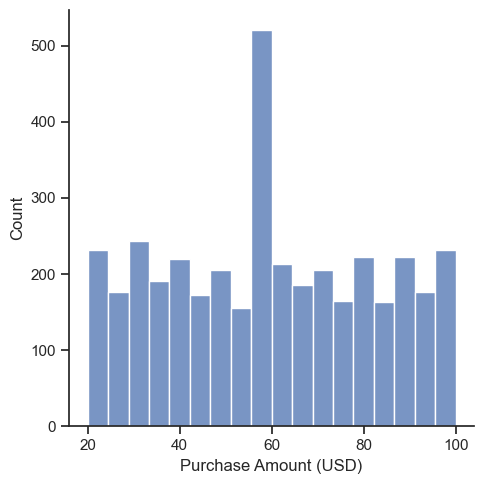

In [72]:
sns.displot(data['Purchase Amount (USD)'])

In [73]:
scl = MinMaxScaler()
scl_data = scl.fit_transform(filled_data[['Purchase Amount (USD)']])
filled_data['Purchase Amount (USD)'] = scl_data

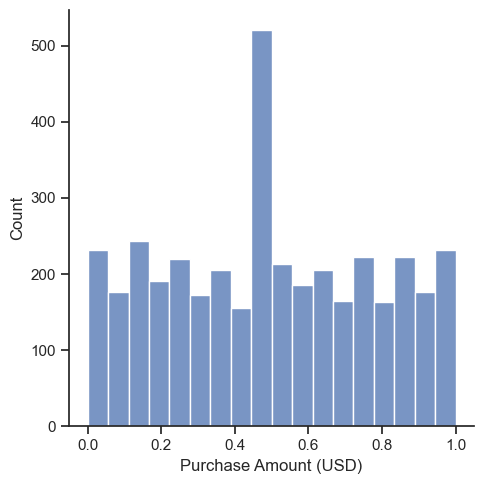

In [74]:
sns.displot(filled_data['Purchase Amount (USD)'])